# Final Notebook Pt 3.1: Transit Overlays

**By:** Andrew Williams and Ben Brassette
    
**Description:** This notebook is building on earlier work for each neighborhood. Purpose is to intergrate bus lines and rail stations and our other remaining datasets. We are tackling points 1, 3, 6, and 7 in this notebook. Additonally, this notebook is building off of ealier transit notebooks which will serves as the foundation. 

**Expected Outputs**
* Overlay of rail stops and bus lines

**Areas Where We Need More Work**
* Coordinate maps and charts
* Create story map
* Clean Notebooks, with outputs leading to inssight for our paper

**Notes for self to advance project:**
1.  Biggest step forward, intergrating our notebooks in the remaining few weeks in a targeted fashion
2.  Overlay heavy rail and light rail stops
3.  Provide more accurate description of the areas through a spatial join
4. Compare with race/ethnicity and income data; we should create some side by side comparisons of transit use and race/eth and income
5. Query "high" transit tracts, cross reference with income and race/eth, potential to add spatial dimension of LA neighborhoods
6. Availability of cars in households
7. Bring a shaprer focus to Central LA and the San Fernando Valley

# Importing Libraries and Datasets

Importing libraries for gpd, plotting, and basepamps.

In [1]:
import urllib.request, json 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import contextily as ctx

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


Import was successful.

Importing datasets: rail, bus, and bus frequency.

In [2]:
rail_stops = gpd.read_file('Data/RailStations0715/Stations_All_0715.shp')

bus_freq = gpd.read_file('Data/means2work_freq/Existing_Bus_System.shp')

Shape files are ready for exploration now. 

# Bus Frequency 

This is new bus data. I imagine it will mirror much of what I had before from just the LA Metro bus lines, with the addition of frequency. I'm going to explore it a little but and see what I have to work with.

In [3]:
type(bus_freq)

geopandas.geodataframe.GeoDataFrame

In [4]:
bus_freq.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rte         158 non-null    float64 
 1   rte2        158 non-null    object  
 2   rteDesc     158 non-null    object  
 3   rteNum      158 non-null    object  
 4   tier        158 non-null    object  
 5   ampk_1      158 non-null    float64 
 6   midday_1    158 non-null    float64 
 7   pmpk_1      158 non-null    float64 
 8   seven_9_10  158 non-null    float64 
 9   ten_12_13   158 non-null    float64 
 10  owl_1       158 non-null    float64 
 11  sa68        158 non-null    float64 
 12  sa111       158 non-null    float64 
 13  sa35        158 non-null    float64 
 14  sa79        158 non-null    float64 
 15  sa1012      158 non-null    float64 
 16  sa24        158 non-null    float64 
 17  su68        158 non-null    float64 
 18  su111       158 non-null    float64 
 19  

Lots of columns! I can vaugely picture what I this will say in terms of frequency.

In [5]:
bus_freq.shape

(158, 24)

In [6]:
bus_freq.head(3)

,rte,rte2,rteDesc,rteNum,tier,ampk_1,midday_1,pmpk_1,seven_9_10,ten_12_13,...,sa79,sa1012,sa24,su68,su111,su35,su79,su1012,su24,geometry
0,2.0,2,Sunset Blvd,2,Local,15.0,15.0,15.0,20.0,30.0,...,20.0,30.0,60.0,20.0,20.0,20.0,30.0,30.0,60.0,"MULTILINESTRING ((-13165102.619 4033296.175, -..."
1,4.0,4,Santa Monica Blvd,4,Local,10.0,15.0,10.0,20.0,20.0,...,20.0,20.0,30.0,20.0,15.0,15.0,25.0,25.0,25.0,"MULTILINESTRING ((-13190607.696 4031215.079, -..."
2,10.0,10,Melrose/San Pedro,10/48,Local,7.5,20.0,10.0,30.0,60.0,...,18.0,60.0,60.0,30.0,20.0,20.0,40.0,60.0,60.0,"MULTILINESTRING ((-13165702.631 4019568.409, -..."


In [7]:
bus_freq.tail(3)

,rte,rte2,rteDesc,rteNum,tier,ampk_1,midday_1,pmpk_1,seven_9_10,ten_12_13,...,sa79,sa1012,sa24,su68,su111,su35,su79,su1012,su24,geometry
155,686.0,686,Altadena - Pasadena,686,Shuttles,40.0,40.0,40.0,50.0,0.0,...,60.0,0.0,0.0,30.0,60.0,60.0,60.0,0.0,0.0,"MULTILINESTRING ((-13152272.937 4048395.170, -..."
156,950.0,950,Silver Line,950,Busway,5.0,30.0,5.0,30.0,20.0,...,40.0,20.0,60.0,30.0,30.0,30.0,40.0,20.0,60.0,"MULTILINESTRING ((-13167756.587 3992199.021, -..."
157,292.0,292,Glenoaks/Brand/Glendale,292,Local,25.0,25.0,25.0,35.0,60.0,...,60.0,60.0,60.0,40.0,40.0,40.0,60.0,60.0,60.0,"MULTILINESTRING ((-13164275.738 4034236.916, -..."


In terms of the the columns, I believe I'm seeing the number of times a bus is being in use during a particular period.

I would like to see what routes/bus-systems/tiers are available in this dataset.

In [8]:
bus_freq['tier'].value_counts()

Local       105
Rapid        20
Shuttles     11
Limited      11
Express       8
Busway        3
Name: tier, dtype: int64

The biggest differnce I see between my previous Metro bus data was that the local lines were subdivided into two categories: CBD and Non-CBD. This one large category seems unruly, but if need be, I can query and sub divide it further. 

Next step is to create to sub-categories which will be easier to call than having an extroadinarly long syntaxt (though I should practice those as well)>

## Local Bus Freq

Will define and quickly map data to see results.

Pulling subset of data- local routes

In [9]:
local_f = bus_freq[bus_freq.tier == 'Local']
local_f.sample(3)

,rte,rte2,rteDesc,rteNum,tier,ampk_1,midday_1,pmpk_1,seven_9_10,ten_12_13,...,sa79,sa1012,sa24,su68,su111,su35,su79,su1012,su24,geometry
53,166.0,166,Nordhoff St,166,Local,15.0,24.0,15.0,40.0,60.0,...,60.0,0.0,0.0,40.0,40.0,40.0,40.0,0.0,0.0,"MULTILINESTRING ((-13200285.701 4059974.715, -..."
52,165.0,165,Vanowen St,165,Local,6.5,30.0,10.0,30.0,60.0,...,60.0,60.0,0.0,40.0,40.0,40.0,40.0,60.0,0.0,"MULTILINESTRING ((-13169957.485 4052543.984, -..."
32,106.0,106,State/Boyle/1st,106,Local,50.0,50.0,50.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTILINESTRING ((-13157114.667 4033337.548, -..."


Pulling subset of data- Rapid routes

In [10]:
local_f = bus_freq[bus_freq.tier == 'Local']
local_f.sample(3)

,rte,rte2,rteDesc,rteNum,tier,ampk_1,midday_1,pmpk_1,seven_9_10,ten_12_13,...,sa79,sa1012,sa24,su68,su111,su35,su79,su1012,su24,geometry
90,258.0,258,Altadena - Paramount,258,Local,40.0,40.0,40.0,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTILINESTRING ((-13154487.193 4013929.017, -..."
89,256.0,256,Altadena - Commerce,256,Local,50.0,50.0,50.0,45.0,0.0,...,60.0,0.0,0.0,60.0,60.0,60.0,60.0,0.0,0.0,"MULTILINESTRING ((-13155168.913 4031023.698, -..."
12,45.0,45,Broadway Blvd,45,Local,5.0,15.0,10.0,25.0,60.0,...,30.0,60.0,60.0,20.0,12.0,15.0,30.0,60.0,60.0,"MULTILINESTRING ((-13165172.305 4008347.492, -..."


This is great! Much better than my previous bus maps. I'm going to cycle through and finish defining these subcategoires. Next steps would include a query into which routes are the heavist used and then overlay that with transit census tracts. 

## Rapid Freq

Pulling subset of data- Rapid routes

In [11]:
rapid_f = bus_freq[bus_freq.tier == 'Rapid']
rapid_f.sample(3)

,rte,rte2,rteDesc,rteNum,tier,ampk_1,midday_1,pmpk_1,seven_9_10,ten_12_13,...,sa79,sa1012,sa24,su68,su111,su35,su79,su1012,su24,geometry
115,710.0,710,Crenshaw Blvd Rapid,710,Rapid,10.0,20.0,10.0,20.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTILINESTRING ((-13174962.075 4011927.201, -..."
117,728.0,728,Olympic Blvd Rapid,728,Rapid,10.0,20.0,12.0,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTILINESTRING ((-13164469.434 4034391.139, -..."
129,770.0,770,Cesar Chavez/Garvey Rapid,770,Rapid,12.0,15.0,12.0,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTILINESTRING ((-13165242.852 4033388.508, -..."


Also revealing. I'm curious what the line on the far east of the map is and what its connections are to job centers, other lines. 

## Limited Frew

Pulling subset of data- Limited routes

In [12]:
limited_f = bus_freq[bus_freq.tier == 'Limited']
limited_f.sample(3)

,rte,rte2,rteDesc,rteNum,tier,ampk_1,midday_1,pmpk_1,seven_9_10,ten_12_13,...,sa79,sa1012,sa24,su68,su111,su35,su79,su1012,su24,geometry
148,353.0,353,Roscoe Blvd,353,Limited,20.0,25.0,25.0,35.0,60.0,...,60.0,60.0,0.0,35.0,30.0,30.0,60.0,60.0,0.0,"MULTILINESTRING ((-13177400.529 4050969.116, -..."
149,355.0,355,Adams/Compton,355,Limited,15.0,20.0,15.0,60.0,60.0,...,30.0,60.0,60.0,30.0,23.0,23.0,60.0,60.0,60.0,"MULTILINESTRING ((-13163095.863 4018571.592, -..."
150,358.0,358,Slauson Ave,358,Limited,7.5,15.0,9.0,25.0,60.0,...,40.0,60.0,0.0,25.0,20.0,20.0,60.0,60.0,0.0,"MULTILINESTRING ((-13149546.500 4025453.953, -..."


## Shuttle Freq

Pulling subset of data-- for Shuttles

In [13]:
shuttle_f = bus_freq[bus_freq.tier == 'Shuttles']
shuttle_f.sample(3)

,rte,rte2,rteDesc,rteNum,tier,ampk_1,midday_1,pmpk_1,seven_9_10,ten_12_13,...,sa79,sa1012,sa24,su68,su111,su35,su79,su1012,su24,geometry
155,686.0,686,Altadena - Pasadena,686,Shuttles,40.0,40.0,40.0,50.0,0.0,...,60.0,0.0,0.0,30.0,60.0,60.0,60.0,0.0,0.0,"MULTILINESTRING ((-13152272.937 4048395.170, -..."
154,656.0,656,Granada Hills - Hollywood,656,Shuttles,45.0,50.0,45.0,60.0,60.0,...,60.0,60.0,0.0,42.0,50.0,50.0,60.0,60.0,0.0,"MULTILINESTRING ((-13173391.580 4040990.961, -..."
110,665.0,665,Cal State LA - East Los Angeles,665,Shuttles,40.0,40.0,50.0,40.0,0.0,...,0.0,0.0,0.0,0.0,60.0,60.0,0.0,0.0,0.0,"MULTILINESTRING ((-13158745.163 4031319.837, -..."


## Exp Freq

Pulling subset of data- Exp routes

In [14]:
exp_f = bus_freq[bus_freq.tier == 'Express']
exp_f.sample(3)

,rte,rte2,rteDesc,rteNum,tier,ampk_1,midday_1,pmpk_1,seven_9_10,ten_12_13,...,sa79,sa1012,sa24,su68,su111,su35,su79,su1012,su24,geometry
102,550.0,550,Exposition Park - San Pedro,550,Express,30.0,60.0,30.0,60.0,0.0,...,60.0,60.0,0.0,60.0,60.0,60.0,60.0,60.0,0.0,"MULTILINESTRING ((-13168241.829 3993658.848, -..."
153,489.0,489,Los Angeles - El Monte,489,Express,25.0,40.0,40.0,50.0,0.0,...,60.0,0.0,0.0,60.0,50.0,50.0,60.0,0.0,0.0,"MULTILINESTRING ((-13164315.591 4035339.898, -..."
99,487.0,487,Los Angeles - El Monte,487,Express,25.0,40.0,40.0,50.0,0.0,...,60.0,0.0,0.0,60.0,50.0,50.0,60.0,0.0,0.0,"MULTILINESTRING ((-13164315.591 4035339.898, -..."


## Busway Freq

Pulling subset of data- Busway routes

In [15]:
bw_f = bus_freq[bus_freq.tier == 'Busway']
bw_f.sample(3)

,rte,rte2,rteDesc,rteNum,tier,ampk_1,midday_1,pmpk_1,seven_9_10,ten_12_13,...,sa79,sa1012,sa24,su68,su111,su35,su79,su1012,su24,geometry
134,910.0,910,Silver Line,910,Busway,5.0,30.0,5.0,30.0,20.0,...,40.0,20.0,60.0,30.0,30.0,30.0,40.0,20.0,60.0,"MULTILINESTRING ((-13167756.587 3992199.021, -..."
156,950.0,950,Silver Line,950,Busway,5.0,30.0,5.0,30.0,20.0,...,40.0,20.0,60.0,30.0,30.0,30.0,40.0,20.0,60.0,"MULTILINESTRING ((-13167756.587 3992199.021, -..."
133,901.0,901,Orange Line,901,Busway,5.0,10.0,5.0,10.0,20.0,...,15.0,20.0,40.0,12.0,10.0,10.0,15.0,20.0,40.0,"MULTILINESTRING ((-13180086.223 4051450.769, -..."


# Rail Line Stations 

Now for some rail lines. Going to do a little exploration. I've done this before during one of our class labs and on my own, but that over a month ago and I'm no longer farmiliar with this dataset.

In [16]:
type(rail_stops)

geopandas.geodataframe.GeoDataFrame

In [17]:
rail_stops.shape

(83, 14)

In [18]:
rail_stops.head(3)

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
0,Blue,801,0,21,0,None,80101,Downtown Long Beach Station,33.768071,-118.192921,Long Bch,6.503030e+06,1.738034e+06,POINT (6503030.095 1738033.828)
1,Blue,801,0,22,0,North,80102,Pacific Ave Station,33.772258,-118.193700,Pacific,6.502796e+06,1.739558e+06,POINT (6502796.262 1739558.050)
2,Blue,801,0,18,0,None,80105,Anaheim Street Station,33.781830,-118.189384,Anaheim,6.504115e+06,1.743039e+06,POINT (6504114.567 1743039.068)


How many rail stops are there per line. 

In [19]:
rail_stops['LINE'].value_counts()

Gold          21
Blue          20
Green         14
EXPO          10
Red            8
Red/Purple     6
Purple         2
Blue/EXPO      2
Name: LINE, dtype: int64

This helpful. Though from previous research, I know rail is not heavily used by LA resdients, or used often at all. LA is a car city first, then a bus city. Still, I want to explore the associations with the use of high transit.

There are more robust options to do here, especially with folium. 

# Neighborhood Dataset

Downloading master datase, running usual checks, and trimming it down some more.

In [20]:
just_nbh = gpd.read_file('neighborhoods_trimmed.geojson') 

In [21]:
type(just_nbh)

geopandas.geodataframe.GeoDataFrame

In [22]:
just_nbh.sample(3)

,geoid,name,Neighborho,Median Inc,Total Work,Car Total,Drove alon,Carpooled,Public tra,Bus,...,%From Ho_5,%From Ho_6,%From Ho_7,%From Ho_8,%From Ho_9,%From Ho10,%From Ho11,%From Ho12,%From Ho13,geometry
37,14000US06037125401,"Census Tract 1254.01, Los Angeles, CA",North Hollywood,62934.0,3443.0,2775.0,2681.0,94.0,253.0,49.0,...,0.0,3.194888,0.000000,2.004066,0.493755,0.958466,0.0,0.000000,0.0,"POLYGON ((-118.37898 34.16490, -118.37740 34.1..."
13,14000US06037120106,"Census Tract 1201.06, Los Angeles, CA",Panorama City,36217.0,2152.0,1476.0,1231.0,245.0,437.0,437.0,...,0.0,0.000000,0.000000,0.000000,0.046468,0.000000,0.0,1.533457,0.0,"POLYGON ((-118.45985 34.22409, -118.45978 34.2..."
29,14000US06037124104,"Census Tract 1241.04, Los Angeles, CA",North Hollywood,43816.0,1286.0,1052.0,967.0,85.0,34.0,23.0,...,0.0,0.000000,0.466563,0.466563,2.877138,1.710731,0.0,0.000000,0.0,"POLYGON ((-118.38778 34.18667, -118.38647 34.1..."


In [23]:
just_nbh.columns.to_list()

['geoid',
 'name',
 'Neighborho',
 'Median Inc',
 'Total Work',
 'Car Total',
 'Drove alon',
 'Carpooled',
 'Public tra',
 'Bus',
 'Subway or',
 'Long-dista',
 'Light rail',
 'Worked fro',
 '%Car Total',
 '%Drove alo',
 '%Carpooled',
 '%Public tr',
 '%Bus',
 '%Subway or',
 '%Long-dist',
 '%Light rai',
 '%Worked fr',
 'Total Pop',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Is',
 'Hispanic o',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific I',
 '%Hispanic',
 'Total Comm',
 't_Less tha',
 't_10 to 14',
 't_15 to 19',
 't_20 to 24',
 't_25 to 29',
 't_30 to 34',
 't_35 to 44',
 't_45 to 59',
 't_60 or mo',
 'Car, truck',
 'c_Less tha',
 'c_10 to 14',
 'c_15 to 19',
 'c_20 to 24',
 'c_25 to 29',
 'c_30 to 34',
 'c_35 to 44',
 'c_45 to 59',
 'c_60 or mo',
 'Drove al_1',
 'da_Less th',
 'da_10 to 1',
 'da_15 to 1',
 'da_20 to 2',
 'da_25 to 2',
 'da_30 to 3',
 'da_35 to 4',
 'da_45 to 5',
 'da_60 or m',
 'Carpooled_',
 'cp_Less th',
 'cp_10 to 1',
 'cp_15 to 1',
 'cp_20 to 2'

In [24]:
keep= ['geoid',
 'name',
 'Neighborho',
 'Median Inc',
 'Total Work',
 'Car Total',
 'Drove alon',
 'Carpooled',
 'Public tra',
 'Bus',
 'Subway or',
 'Long-dista',
 'Light rail',
 'Worked fro',
 '%Car Total',
 '%Drove alo',
 '%Carpooled',
 '%Public tr',
 '%Bus',
 '%Subway or',
 '%Long-dist',
 '%Light rai',
 '%Worked fr',
 'Total Pop',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Is',
 'Hispanic o',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific I',
 '%Hispanic',
 'geometry']

In [25]:
just_nbh=just_nbh[keep]
just_nbh

,geoid,name,Neighborho,Median Inc,Total Work,Car Total,Drove alon,Carpooled,Public tra,Bus,...,Asian,Pacific Is,Hispanic o,%White,%Black,%Native,%Asian,%Pacific I,%Hispanic,geometry
0,14000US06037119310,"Census Tract 1193.10, Los Angeles, CA",Panorama City,47959.0,2122.0,1911.0,1730.0,181.0,142.0,122.0,...,648.0,0.0,2686.0,14.02,4.26,0.15,15.86,0.0,65.72,"POLYGON ((-118.45609 34.24271, -118.45578 34.2..."
1,14000US06037119320,"Census Tract 1193.20, Los Angeles, CA",Panorama City,72813.0,2734.0,2370.0,2084.0,286.0,163.0,163.0,...,861.0,0.0,3426.0,5.50,6.03,0.00,17.55,0.0,69.83,"POLYGON ((-118.45772 34.23549, -118.45766 34.2..."
2,14000US06037119340,"Census Tract 1193.40, Los Angeles, CA",Panorama City,30817.0,1805.0,1203.0,953.0,250.0,371.0,367.0,...,103.0,0.0,3999.0,0.09,3.71,0.00,2.42,0.0,93.79,"POLYGON ((-118.45355 34.23315, -118.45355 34.2..."
3,14000US06037119341,"Census Tract 1193.41, Los Angeles, CA",Panorama City,51083.0,1411.0,1206.0,972.0,234.0,87.0,80.0,...,772.0,0.0,1560.0,13.88,4.74,0.00,26.71,0.0,53.98,"POLYGON ((-118.45024 34.23904, -118.44912 34.2..."
4,14000US06037119342,"Census Tract 1193.42, Los Angeles, CA",Panorama City,58611.0,1455.0,1251.0,1068.0,183.0,140.0,135.0,...,378.0,0.0,2249.0,6.97,1.99,0.65,12.99,0.0,77.26,"POLYGON ((-118.45024 34.24023, -118.45024 34.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,14000US06037269601,"Census Tract 2696.01, Los Angeles, CA",Mid-City,53664.0,1759.0,1448.0,1343.0,105.0,242.0,238.0,...,171.0,0.0,2000.0,13.85,21.49,0.00,5.04,0.0,58.94,"POLYGON ((-118.38253 34.04138, -118.38198 34.0..."
78,14000US06037269602,"Census Tract 2696.02, Los Angeles, CA",Mid-City,58668.0,1774.0,1487.0,1396.0,91.0,80.0,74.0,...,124.0,0.0,994.0,33.30,14.03,0.00,4.33,0.0,34.69,"POLYGON ((-118.38730 34.04228, -118.38659 34.0..."
79,14000US06037269700,"Census Tract 2697, Los Angeles, CA",Mid-City,89450.0,2118.0,1821.0,1729.0,92.0,92.0,63.0,...,507.0,0.0,1136.0,40.95,8.91,0.00,14.30,0.0,32.04,"POLYGON ((-118.39390 34.03314, -118.39338 34.0..."
80,14000US06037270200,"Census Tract 2702, Los Angeles, CA",Mid-City,67516.0,1935.0,1504.0,1381.0,123.0,265.0,215.0,...,336.0,0.0,1691.0,26.44,6.51,0.00,10.42,0.0,52.42,"POLYGON ((-118.39047 34.03101, -118.38845 34.0..."


In [26]:
just_nbh.columns= ['geoid',
 'name',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
  'geometry',]

In [27]:
just_nbh.sample(3)

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,Asian,Pacific Islander,Hispanic or Latino,%White,%Black,%Native,%Asian,%Pacific Islander,%Hispanic or Latino,geometry
39,14000US06037125501,"Census Tract 1255.01, Los Angeles, CA",North Hollywood,46767.0,2091.0,1695.0,1581.0,114.0,146.0,72.0,...,240.0,0.0,606.0,59.76,10.39,0.16,7.86,0.0,19.86,"POLYGON ((-118.37024 34.16490, -118.36914 34.1..."
33,14000US06037124204,"Census Tract 1242.04, Los Angeles, CA",North Hollywood,43385.0,1169.0,903.0,863.0,40.0,110.0,71.0,...,112.0,0.0,1216.0,30.25,3.19,0.00,5.11,0.0,55.47,"POLYGON ((-118.37903 34.17578, -118.37630 34.1..."
71,14000US06037224010,"Census Tract 2240.10, Los Angeles, CA",Downtown,28082.0,1593.0,733.0,577.0,156.0,518.0,432.0,...,266.0,0.0,1639.0,13.85,17.64,0.00,9.35,0.0,57.61,"POLYGON ((-118.27388 34.03823, -118.27386 34.0..."


# Bus Maps

First map will be just for looking at general bus routes overlayed on neighborhoods.

In [28]:
just_nbh = just_nbh.to_crs(epsg=3857)

In [29]:
minx, miny, maxx, maxy = just_nbh.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13187767.045076547
-13160492.100039834
4030777.7936989213
4062503.8834360885


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(-13236887.12105036, -13120347.269314, 3985354.6415837146, 4077083.4920334266)

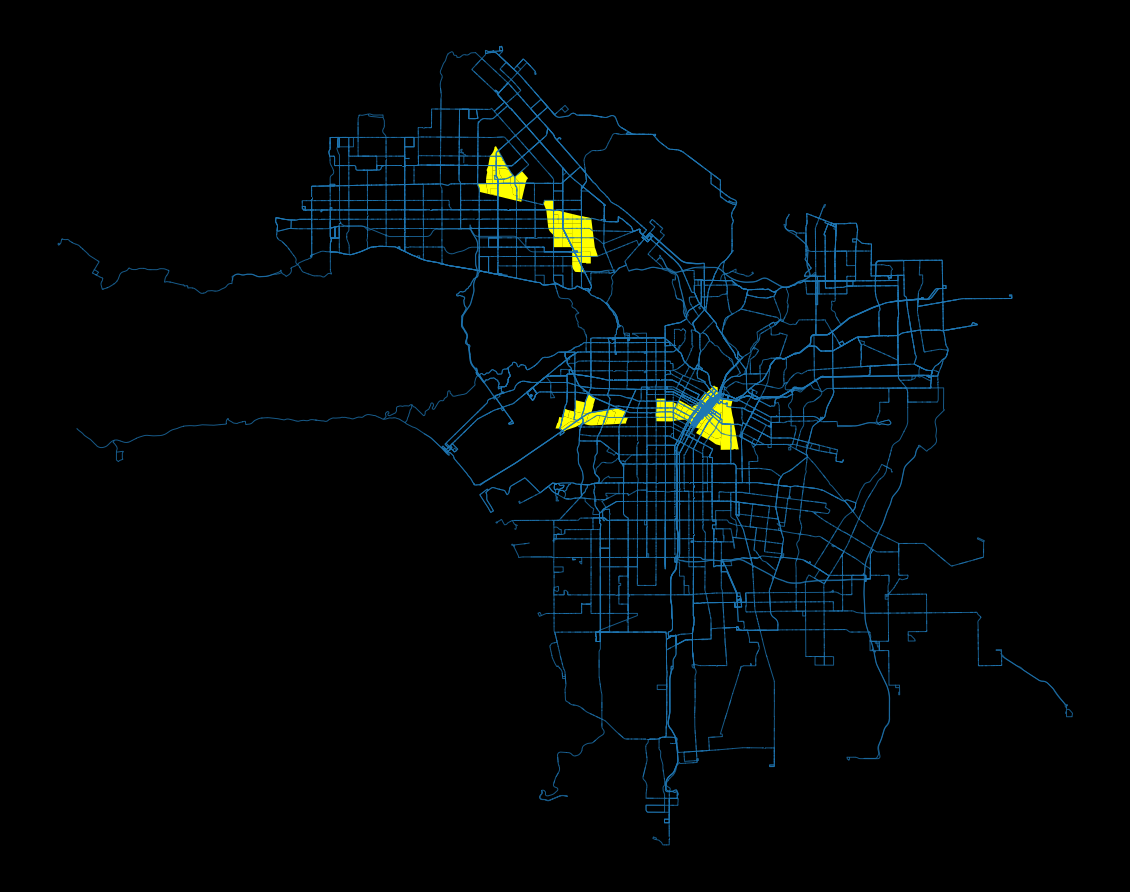

In [30]:
fig,ax = plt.subplots(figsize=(20,20))

just_nbh.plot(ax=ax, column='Neighborhood', color='yellow', zorder=15,lw=0.5)

bus_freq.plot(ax=ax, alpha=0.75, zorder=20, lw=1, legend=True)


fig.patch.set_facecolor('black')
ax.axis('off')
#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

* Playing around woth colors...
* Central LA...well is centrally located. Bus routes go through Downtown in high frequency. 
* Well connected on a broad level, but how serivce actually opertates remains another question
* Strong street grid in SF Valeey neighborhoods, could indicate easier connectivity and access to bus routes, more research needed

Bus Frequencies 

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(-13236887.12105036, -13120347.269314, 3985354.6415837146, 4077083.4920334266)

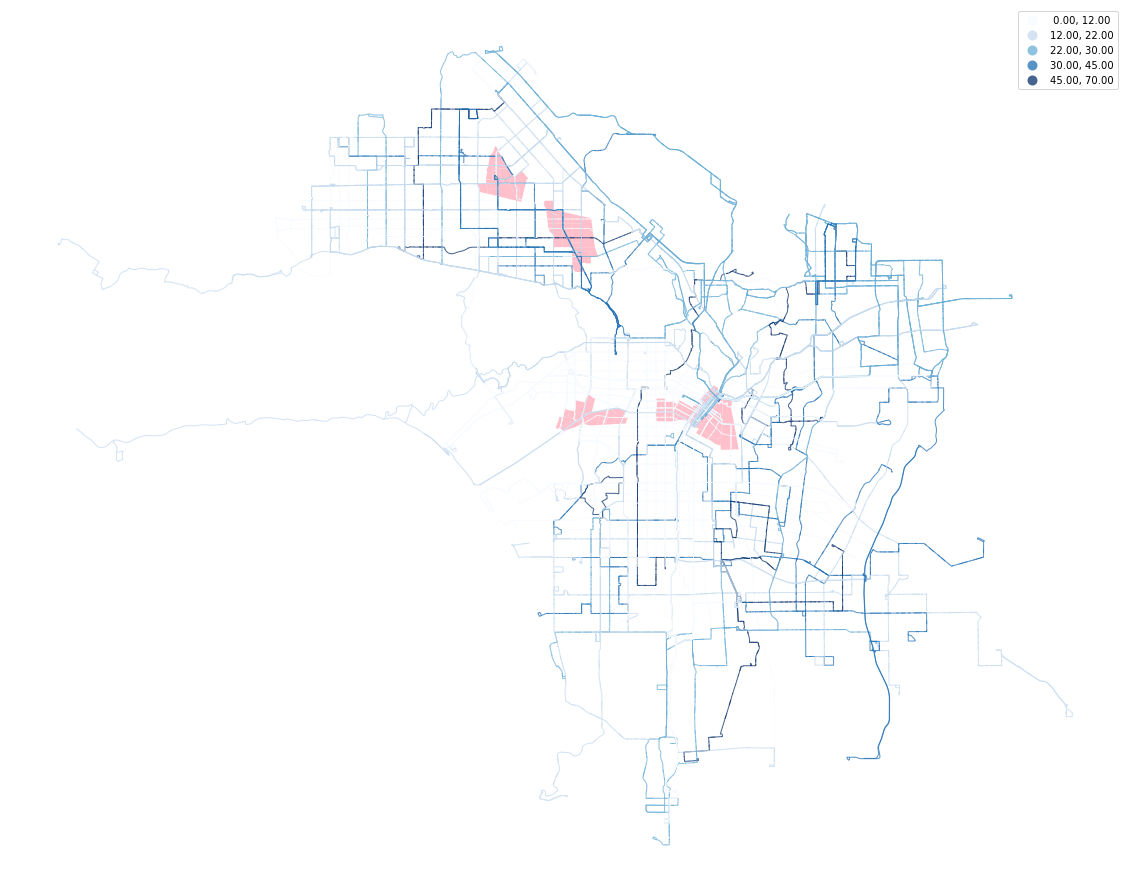

In [31]:
fig,ax = plt.subplots(figsize=(20,20))

just_nbh.plot(ax=ax, column='Neighborhood', color='pink', zorder=15,lw=0.5)

bus_freq.plot(ax=ax, column='ampk_1', cmap='Blues', alpha=0.75, zorder=20, lw=1, legend=True, scheme='NaturalBreaks')

ax.axis('off')
#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

* Map show bus frequencies.
* Not as frequent buses running in DT or PU, but there are a greater number of routes going through those areas.
* Higher frequencies on the outskirts, especially in east LA, and in the SF Valley

Buses running over 25 times during peak AM times

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(-13205887.470423684,
 -13128462.527002625,
 3988959.2505806894,
 4076312.392841421)

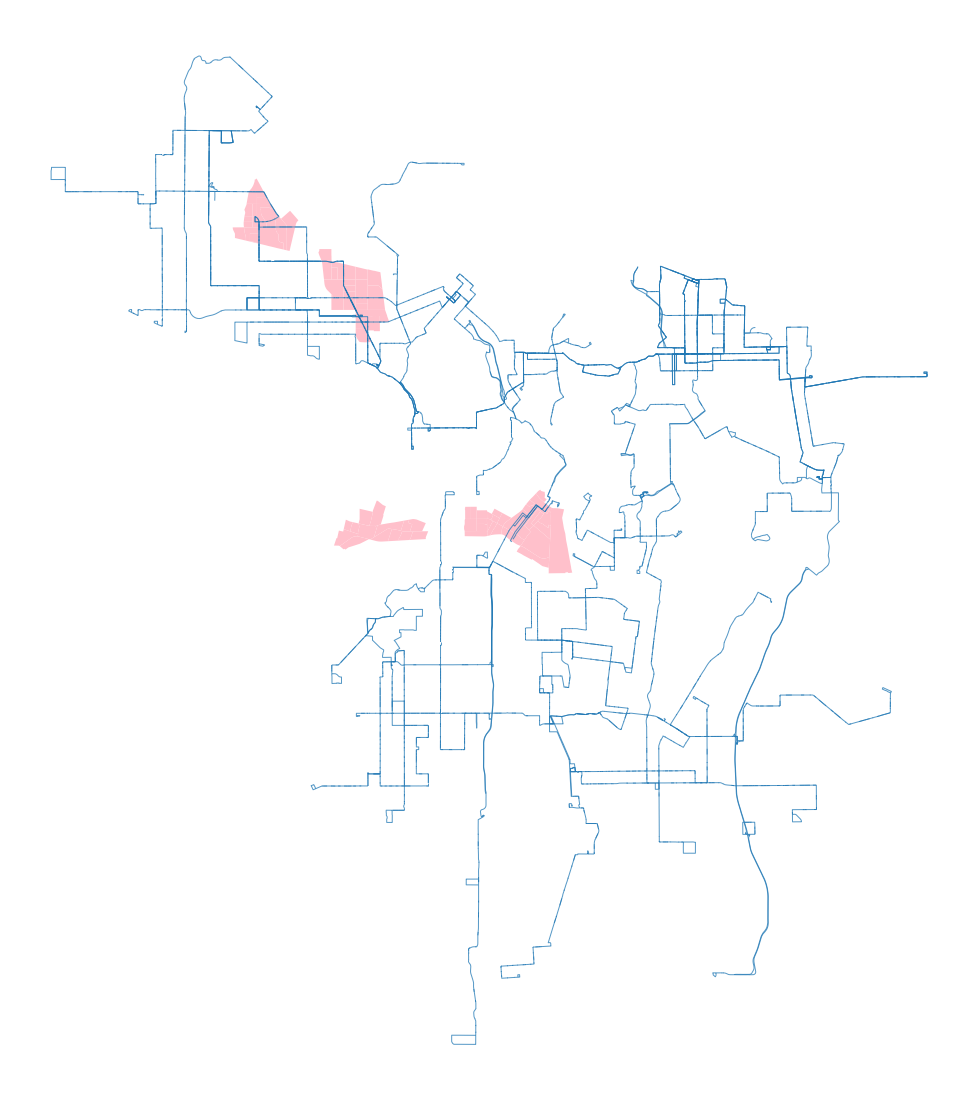

In [32]:
fig,ax = plt.subplots(figsize=(20,20))

just_nbh.plot(ax=ax, column='Neighborhood', color='pink', zorder=15,lw=0.5)

bus_freq[bus_freq['ampk_1']>25].plot(ax=ax, alpha=0.75, zorder=20, lw=1, legend=True, scheme='NaturalBreaks')

ax.axis('off')
#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

* No connectivity in MC
* Very few high freq buses runnin DT, none in PY, but may be compensated by other routes
* More high freq buses in NH and PC

# A Closer Look

## Central Los Angeles

In [33]:
just_nbh.shape

(82, 37)

In [34]:
minx, miny, maxx, maxy = just_nbh.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13187767.045076547
-13160492.100039834
4030777.7936989213
4062503.8834360885


Bus Percentages

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(-13236887.12105036, -13120347.269314, 3985354.6415837156, 4077083.492033427)

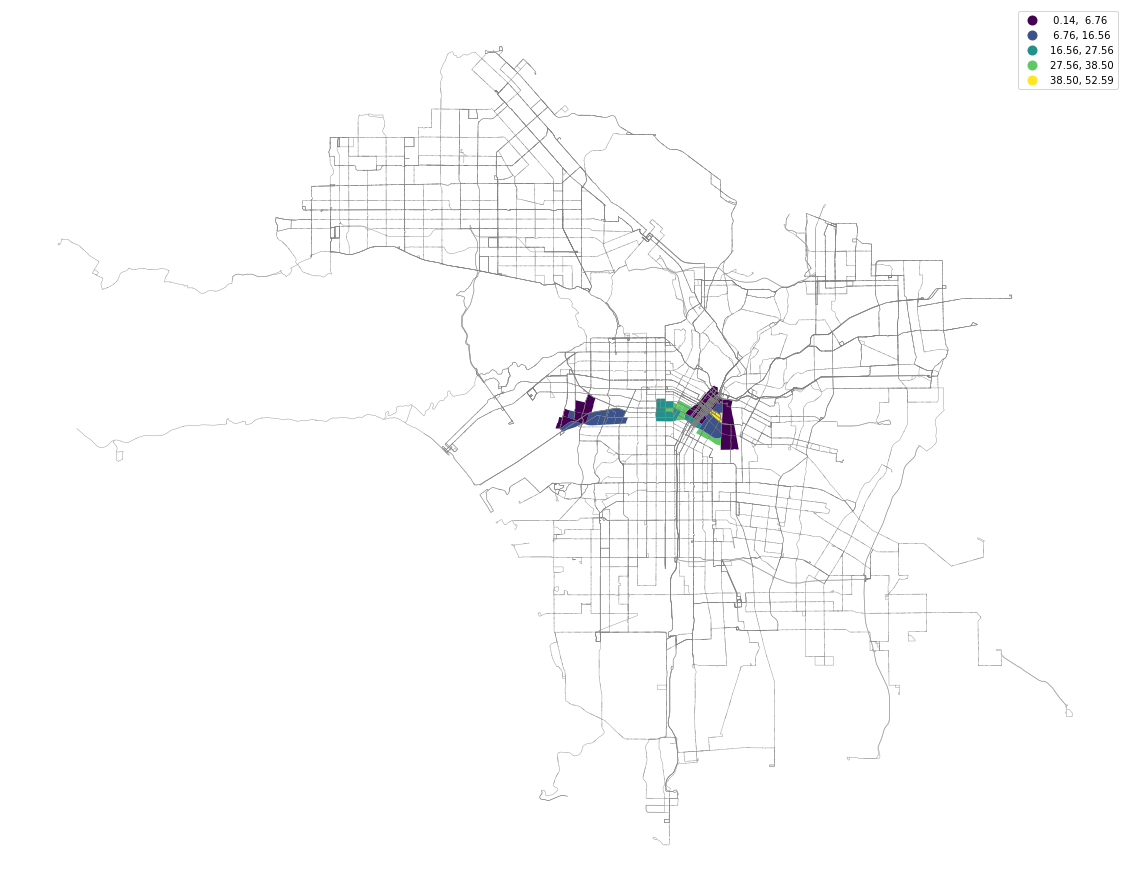

In [35]:
fig,ax = plt.subplots(figsize=(20,20))

just_nbh[(just_nbh['Neighborhood']=='Downtown')|(just_nbh['Neighborhood']=='Pico-Union')|(just_nbh['Neighborhood']=='Mid-City')].plot(ax=ax, column='%Bus', zorder=15,lw=0.5, legend=True, scheme='NaturalBreaks',)

bus_freq.plot(ax=ax, column='ampk_1', color='gray', alpha=0.75, zorder=20, lw=.5, legend=True, scheme='NaturalBreaks')

ax.axis('off')
#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

* Seems well connected, but need a closer look

In [36]:
#alt ctx: ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

In [37]:
#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
#ax.set_xlim(minx+.45,maxx-20)
#ax.set_ylim(miny+20,maxy-10)

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(4030797.7936989213, 4062493.8834360885)

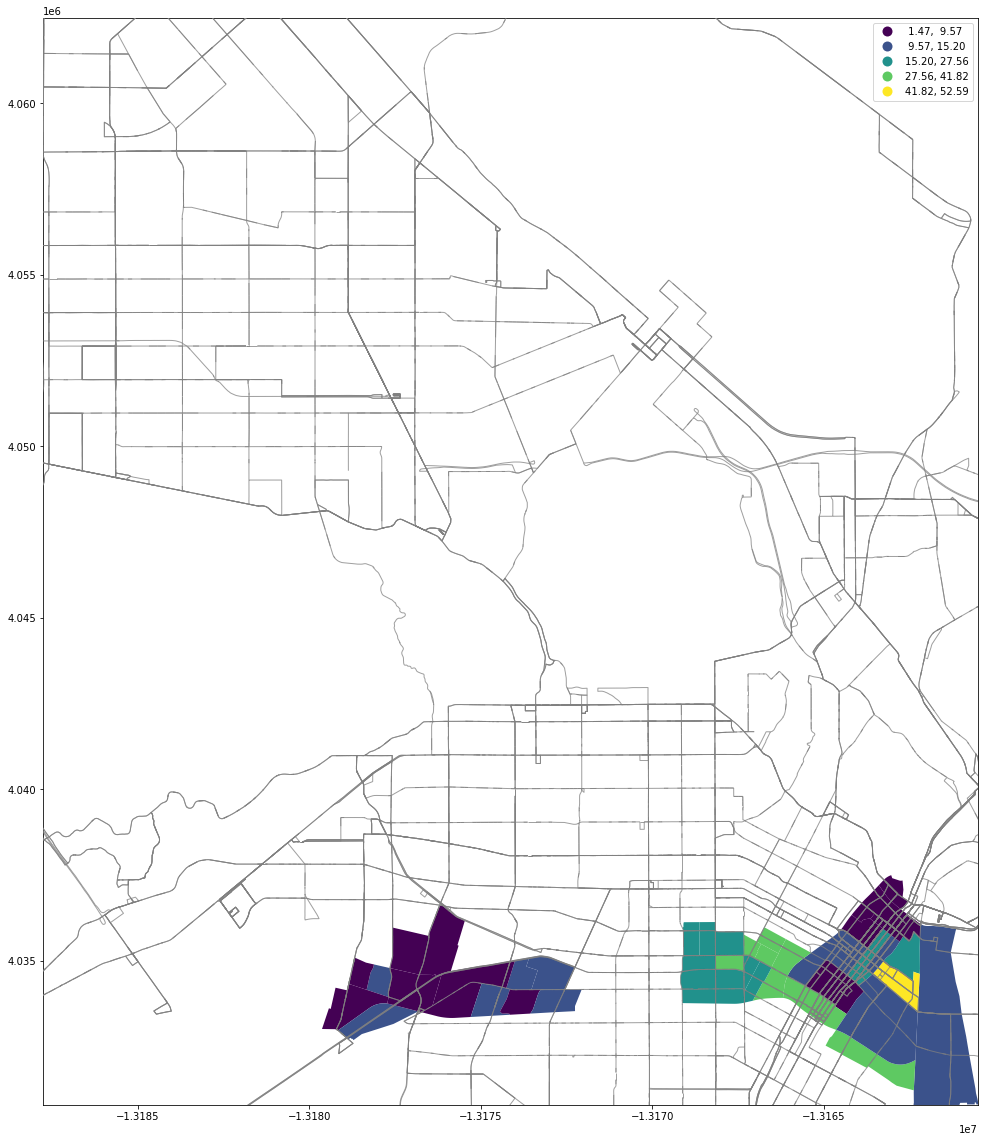

In [38]:
fig,ax = plt.subplots(figsize=(20,20))

just_nbh[(just_nbh['Neighborhood']=='Downtown')|(just_nbh['Neighborhood']=='Pico-Union')|(just_nbh['Neighborhood']=='Mid-City')].plot(ax=ax, column='%Public transportation', zorder=15,lw=0.5, legend=True, scheme='NaturalBreaks')

bus_freq.plot(ax=ax, column='ampk_1', color='gray', alpha=0.75, zorder=20, lw=1,)

ax.set_xlim(minx+.45,maxx-20)
ax.set_ylim(miny+20,maxy-10)
#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

* tons of lines going through DT, and PU, some going through MC
* Difficult again to determine pattern though overlay
* Central LA is well connected, but where are people going?

## San Fernando Valley

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(4030797.7936989213, 4062493.8834360885)

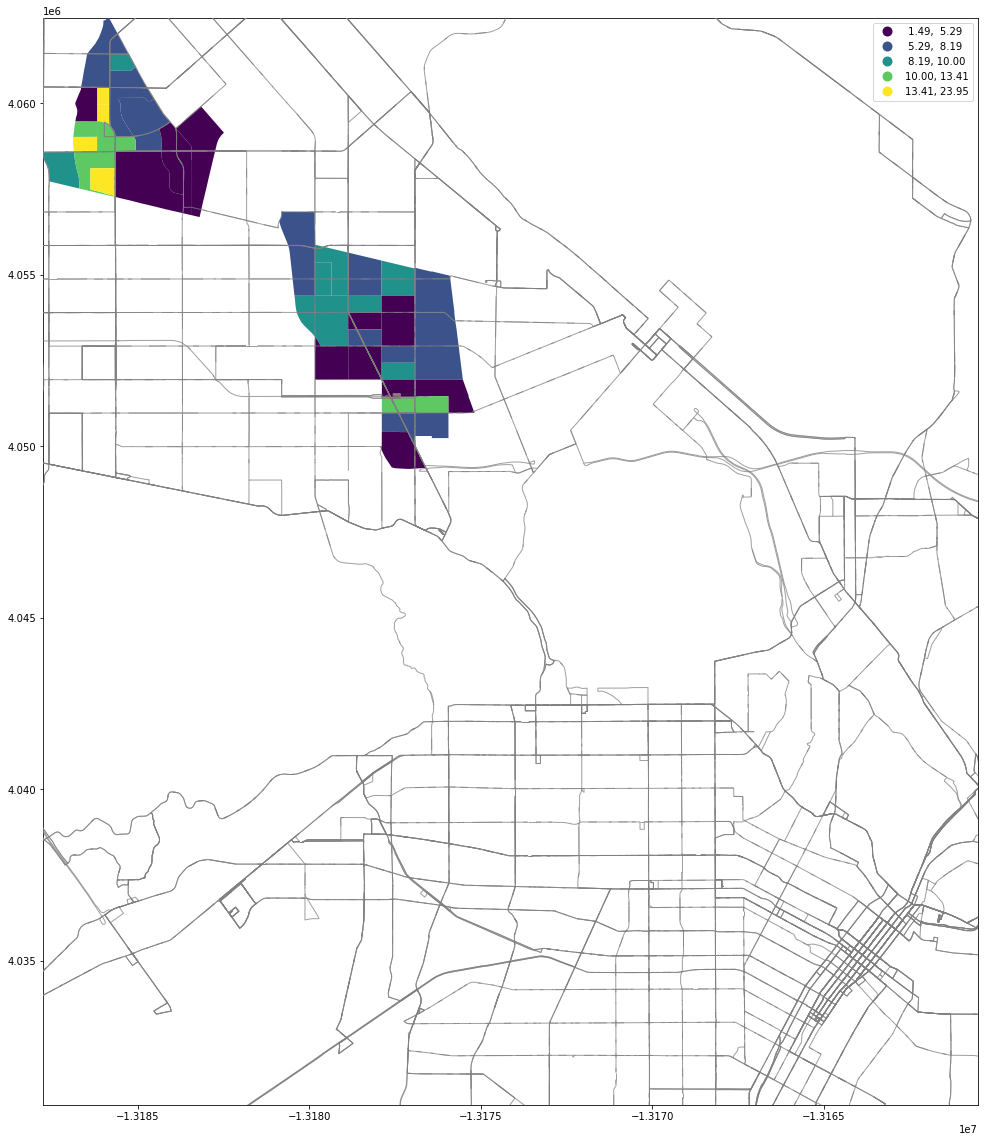

In [39]:
fig,ax = plt.subplots(figsize=(20,20))

just_nbh[(just_nbh['Neighborhood']=='North Hollywood')|(just_nbh['Neighborhood']=='Panorama City')].plot(ax=ax, column='%Public transportation', zorder=10, legend=True, scheme='NaturalBreaks')

bus_freq.plot(ax=ax, column='ampk_1', alpha=0.75, zorder=20, lw=1, legend=True, color='gray')

ax.set_xlim(minx+.45,maxx-20)
ax.set_ylim(miny+20,maxy-10)
#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

* Zoomed in versino of SF Valley
* Not as well served as Central LA, but a good number of buses are runnign through NH and PACI
* Again, difficult it discern patterns with just an overlay

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


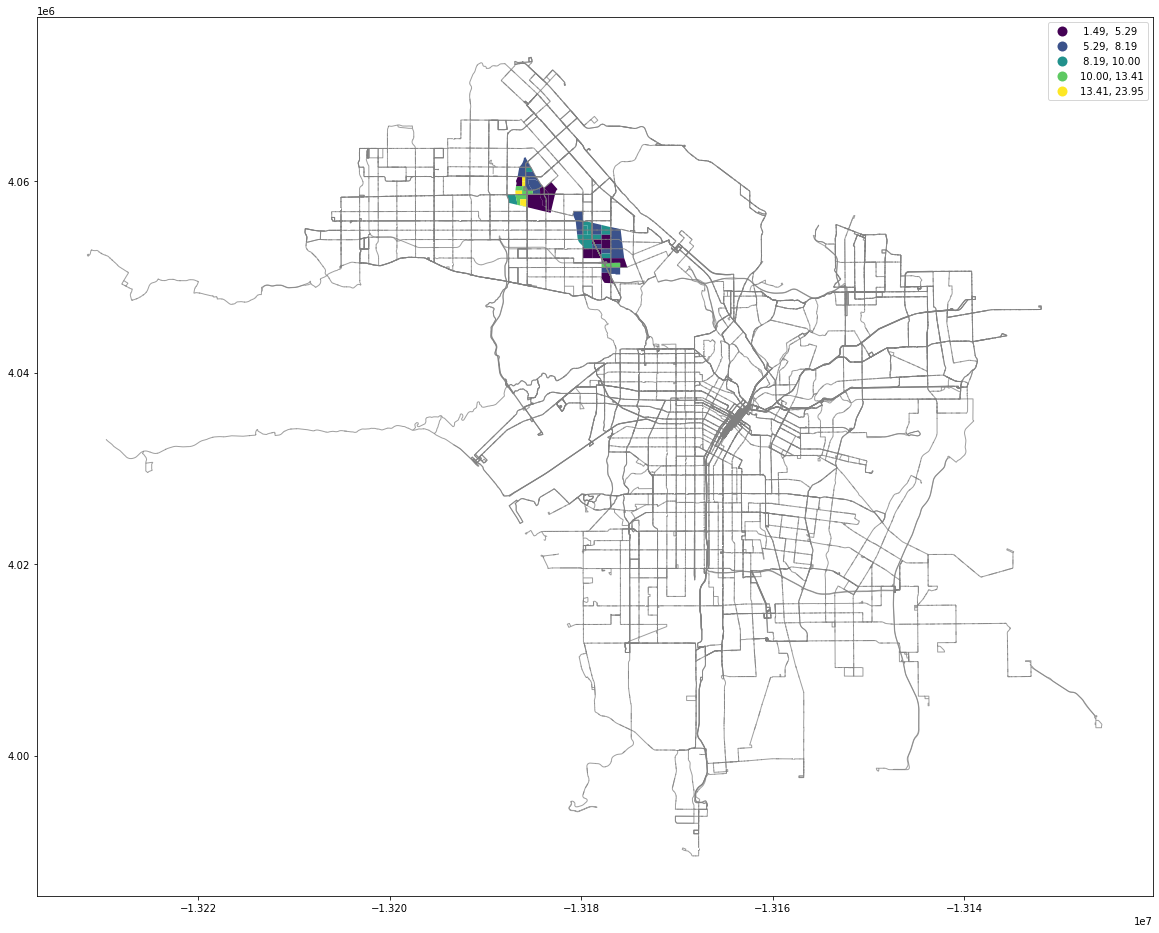

In [40]:
fig,ax = plt.subplots(figsize=(20,20))

just_nbh[(just_nbh['Neighborhood']=='North Hollywood')|(just_nbh['Neighborhood']=='Panorama City')].plot(ax=ax, column='%Public transportation', zorder=10, legend=True, scheme='NaturalBreaks')

bus_freq.plot(ax=ax, column='ampk_1', alpha=0.75, zorder=20, lw=1, legend=True, color='gray')

#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Zoomed out version to show perspective, not much detail can be gathered here

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(4030797.7936989213, 4062493.8834360885)

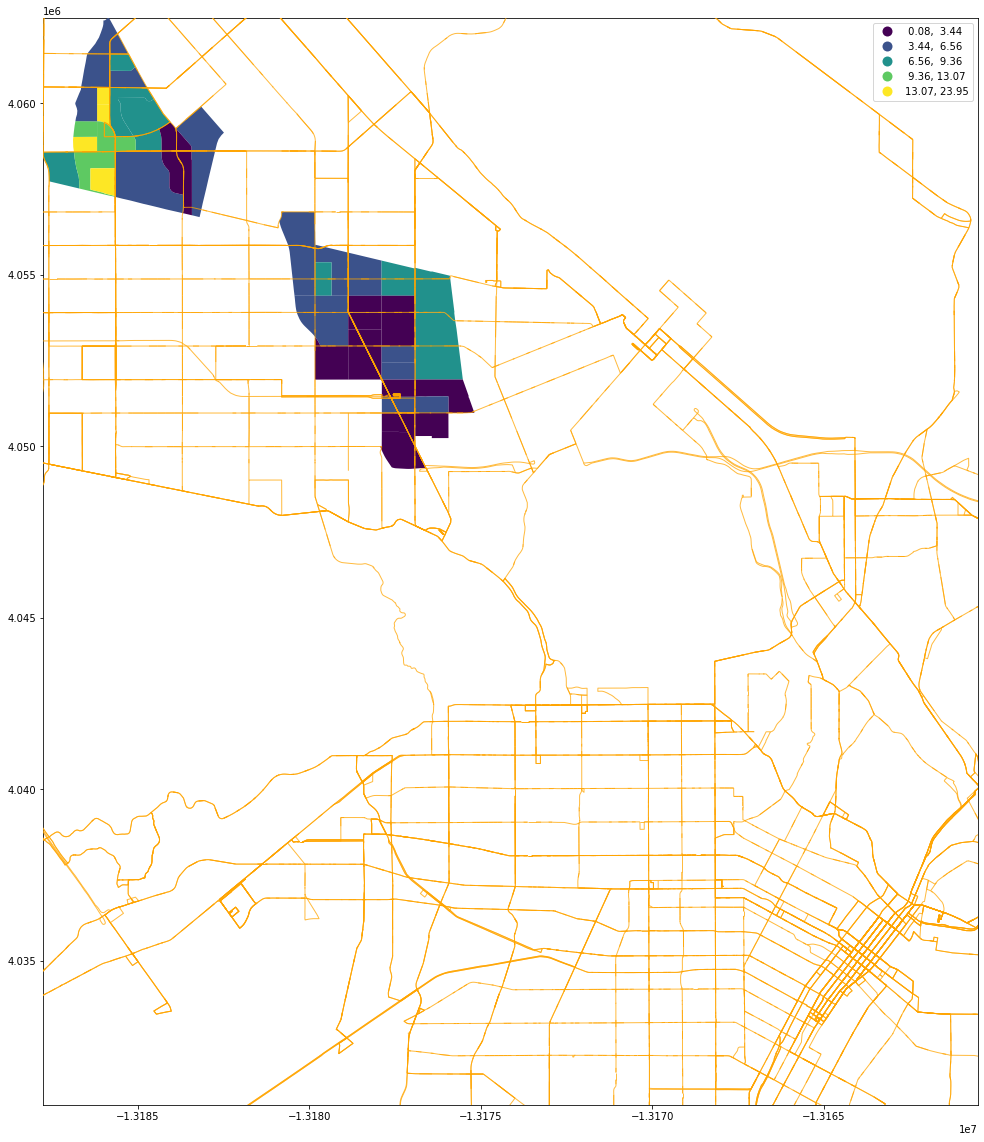

In [41]:
fig,ax = plt.subplots(figsize=(20,20))

just_nbh[(just_nbh['Neighborhood']=='North Hollywood')|(just_nbh['Neighborhood']=='Panorama City')].plot(ax=ax, column='%Bus', zorder=10, legend=True, scheme='NaturalBreaks')

bus_freq.plot(ax=ax, column='ampk_1', color='orange', alpha=0.75, zorder=20, lw=1,)

#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
ax.set_xlim(minx+.45,maxx-20)
ax.set_ylim(miny+20,maxy-10)

Same map as above with different color choices. I like this, but the larger map looks better with gray and I would like to stay consistant.

# Rails

In [42]:
rail_stops.shape

(83, 14)

In [43]:
rail_stops.head()

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
0,Blue,801,0,21,0,None,80101,Downtown Long Beach Station,33.768071,-118.192921,Long Bch,6.503030e+06,1.738034e+06,POINT (6503030.095 1738033.828)
1,Blue,801,0,22,0,North,80102,Pacific Ave Station,33.772258,-118.193700,Pacific,6.502796e+06,1.739558e+06,POINT (6502796.262 1739558.050)
2,Blue,801,0,18,0,None,80105,Anaheim Street Station,33.781830,-118.189384,Anaheim,6.504115e+06,1.743039e+06,POINT (6504114.567 1743039.068)
3,Blue,801,0,17,0,None,80106,Pacific Coast Hwy Station,33.789090,-118.189382,PCH,6.504120e+06,1.745681e+06,POINT (6504120.152 1745681.179)
4,Blue,801,0,16,0,None,80107,Willow Street Station,33.807079,-118.189834,Willow,6.503995e+06,1.752228e+06,POINT (6503995.170 1752228.119)


In [44]:
rail_stops=rail_stops.to_crs(epsg=3857)

Let's plot some rail stops!

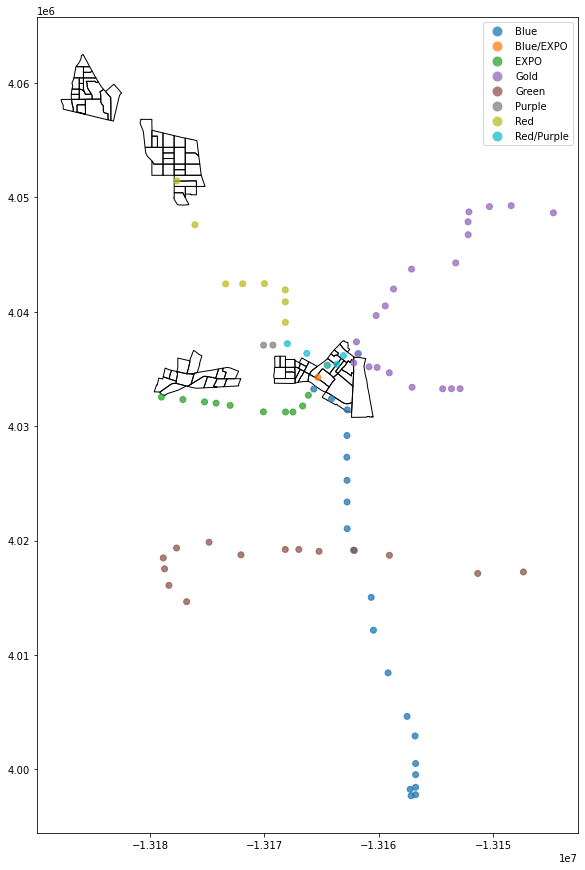

In [45]:
fig, ax = plt.subplots(figsize=(20, 15))

rail_stops.plot(column='LINE', 
            alpha=0.75, 
           zorder=20,
            ax=ax,
            legend=True
           )

just_nbh.boundary.plot(ax=ax, color='black',zorder=10,lw=1)

#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

For some reason, this took longer than it needed
* Subway as whole seems sparse, at least compared to the T in BOS
* Central LA seems very connected from just an overlay
* Mid-City, minues one tract, and Panorama City seems very unconnected

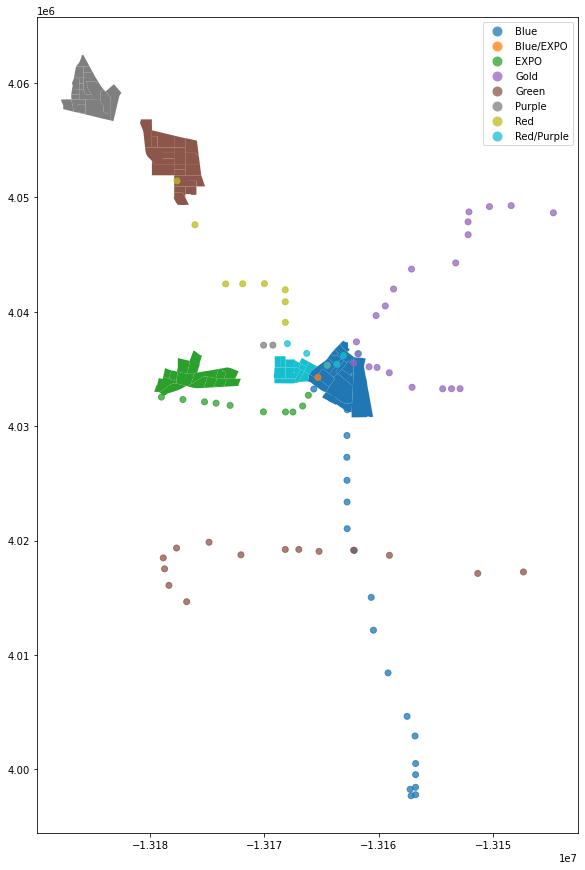

In [46]:
fig, ax = plt.subplots(figsize=(20, 15))

rail_stops.plot(column='LINE', 
            alpha=0.75, 
            ax=ax,
                zorder=20,
            legend=True
           )

just_nbh.plot(ax=ax, column="Neighborhood", cmap='tab10', zorder=15 ,lw=0.5)


#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Same map as above, but different context

## Zoomed In

SF Valley

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(4030797.7936989213, 4062493.8834360885)

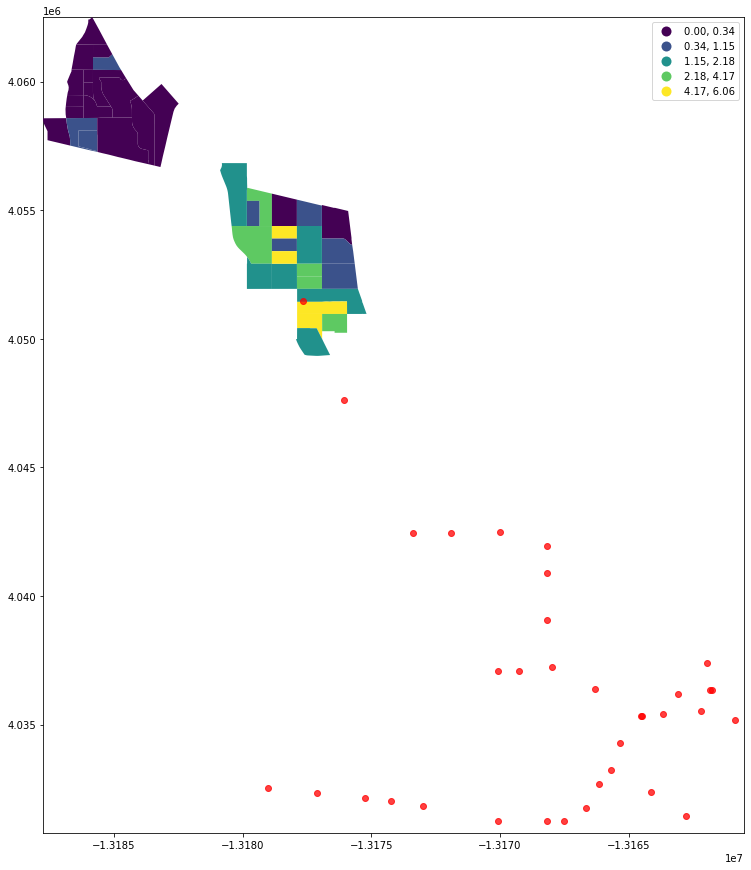

In [47]:
fig, ax = plt.subplots(figsize=(20, 15))

rail_stops.plot(column='LINE', 
            color='red',
            alpha=0.75, 
            zorder=20,
            ax=ax,
            legend=True
           )

just_nbh[(just_nbh['Neighborhood']=='North Hollywood')|(just_nbh['Neighborhood']=='Panorama City')].plot(ax=ax, column='%Subway or elevated il', zorder=10, legend=True, scheme='NaturalBreaks')

ax.set_xlim(minx+.45,maxx-20)
ax.set_ylim(miny+20,maxy-10)
#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

* Makes sense that at least one census tract uses more subway than the rest
* Dismal subway rates a whole
* Curious why there are two tracts north in North Hollywood using sub more. Still low rates nonetheless

Downtown

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(4030797.7936989213, 4062493.8834360885)

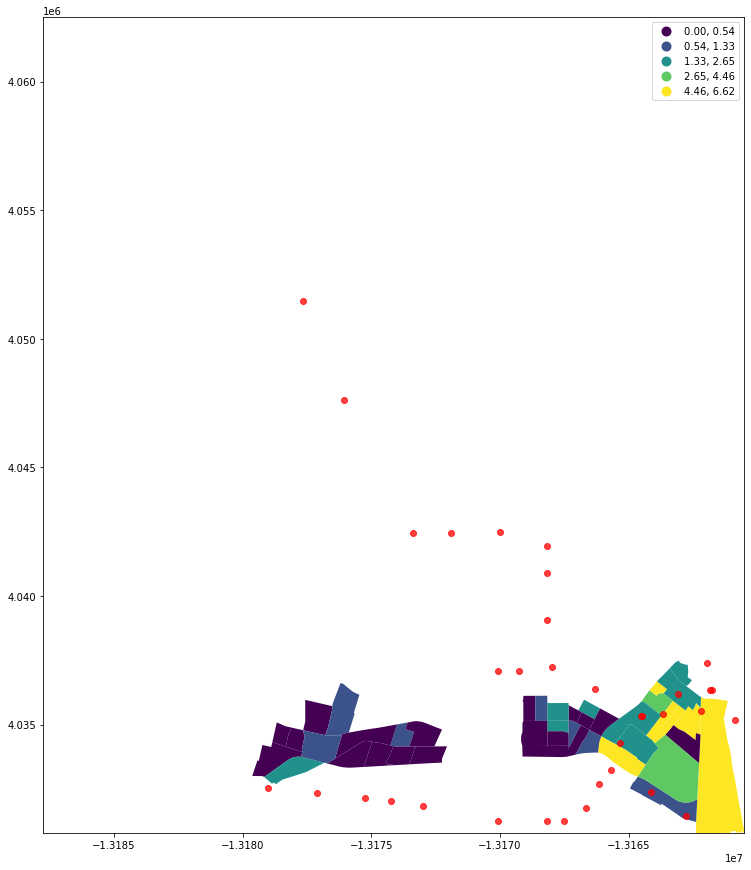

In [48]:
fig, ax = plt.subplots(figsize=(20, 15))

rail_stops.plot(column='LINE', 
            color='red',
            alpha=0.75, 
            zorder=20,
            ax=ax,
            legend=True
           )

just_nbh[(just_nbh['Neighborhood']=='Downtown')|(just_nbh['Neighborhood']=='Pico-Union')|(just_nbh['Neighborhood']=='Mid-City')].plot(ax=ax, column='%Subway or elevated il', zorder=10, legend=True, scheme='NaturalBreaks')

ax.set_xlim(minx+.45,maxx-20)
ax.set_ylim(miny+20,maxy-10)
#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

* Better connectivity and closer to subway stops, but subway is hardly used
* First inclication is that the subway doesn't takt this population, in Downtown at least, where it needs to go